# Gamma Ray Bursts

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt',timeout=90)
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

ConnectionError: HTTPSConnectionPool(host='user-web.icecube.wisc.edu', port=443): Max retries exceeded with url: /~grbweb_public/Summary_table.txt (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x72c002723eb0>: Failed to resolve 'user-web.icecube.wisc.edu' ([Errno -3] Temporary failure in name resolution)"))

### Single parameter

In [41]:
ra      = np.array(data[3],dtype=np.float64)
decl    = np.array(data[4],dtype=np.float64)
T90     = np.array(data[6],dtype=np.float64)
fluence = np.array(data[9],dtype=np.float64)
z       = np.array(data[11],dtype=np.float64)
T100    = np.array(data[12],dtype=np.float64)

In [42]:
# delete NaN values
T100 = T100[T100>0] 
T90 = T90[T90>0]
fluence = fluence[fluence>0]
z = z[z>0]

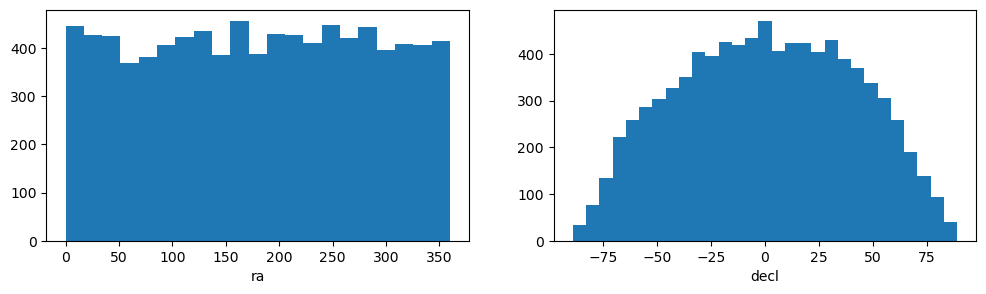

In [46]:
# not informative for clustering
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(121)
ax.hist(ra, bins='fd')
ax.set_xlabel('ra')

ax = fig.add_subplot(122)
ax.hist(decl,bins='fd')
ax.set_xlabel('decl')

plt.show()

In [51]:
logT100 = np.log10(T100)
logT90  = np.log10(T90)
logf    = np.log10(fluence)
logz    = np.log10(z)

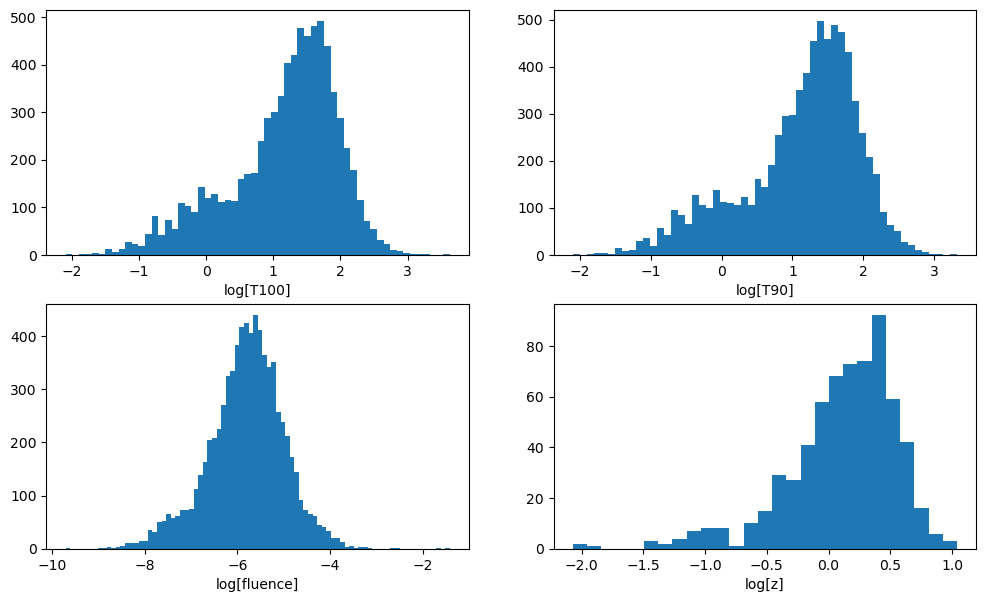

In [52]:
# informative features
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(221)
ax.hist(logT100, bins='fd')
ax.set_xlabel('log[T100]')

ax = fig.add_subplot(222)
ax.hist(logT90, bins='fd')
ax.set_xlabel('log[T90]')

ax = fig.add_subplot(223)
ax.hist(logf, bins='fd')
ax.set_xlabel('log[fluence]')

ax = fig.add_subplot(224)
ax.hist(logz, bins='fd')
ax.set_xlabel('log[z]')

plt.show()

#### Clustering with K-means in 1-dimension

In [ ]:
from sklearn.cluster import KMeans

Threshold = 0.8125122842899827


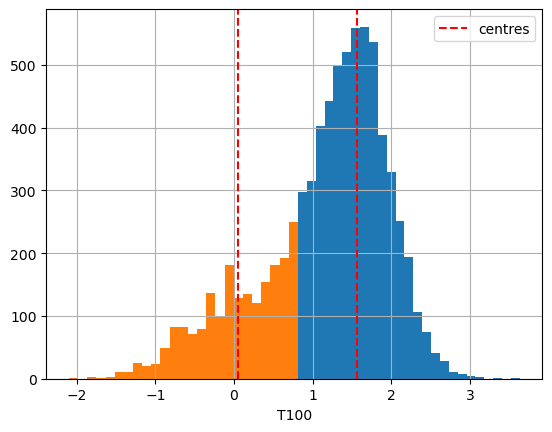

In [101]:
n_clusters = 2                               # long and short GRB

clf = KMeans(n_clusters,n_init='auto') 
clf.fit(logT100[:,np.newaxis])
centers = clf.cluster_centers_               # location of the clusters
labels = clf.predict(logT100[:,np.newaxis])  # labels for each of the points

ThreshKM = min(logT100[labels==np.argmax(centers)])
print('Threshold =',  ThreshKM)

plt.hist(logT100[labels==0],bins=25)
plt.hist(logT100[labels==1],bins=25)
plt.axvline(centers[0],c='r',linestyle='--', label='centres')
plt.axvline(centers[1],c='r',linestyle='--')
plt.grid()
plt.xlabel('T100')
plt.legend()
plt.show()

Threshold = 0.72916478969277


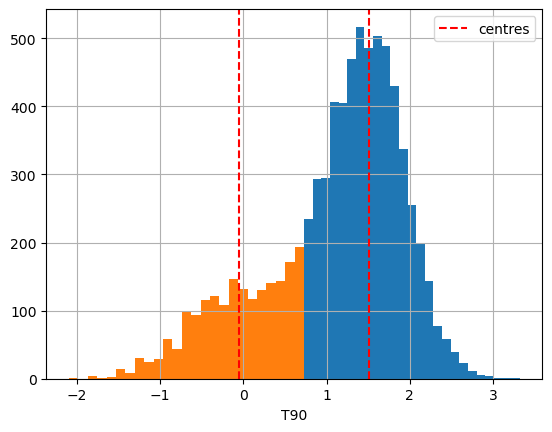

In [71]:
n_clusters = 2                               # long and short GRB

clf = KMeans(n_clusters,n_init='auto') 
clf.fit(logT90[:,np.newaxis])
centers = clf.cluster_centers_               # location of the clusters
labels = clf.predict(logT90[:,np.newaxis])  # labels for each of the points

print('Threshold =', min(logT90[labels==np.argmax(centers)]) )

plt.hist(logT90[labels==0],bins=25)
plt.hist(logT90[labels==1],bins=25)
plt.axvline(centers[0],c='r',linestyle='--', label='centres')
plt.axvline(centers[1],c='r',linestyle='--')
plt.grid()
plt.xlabel('T90')
plt.legend()
plt.show()

Threshold = -5.913640169325252


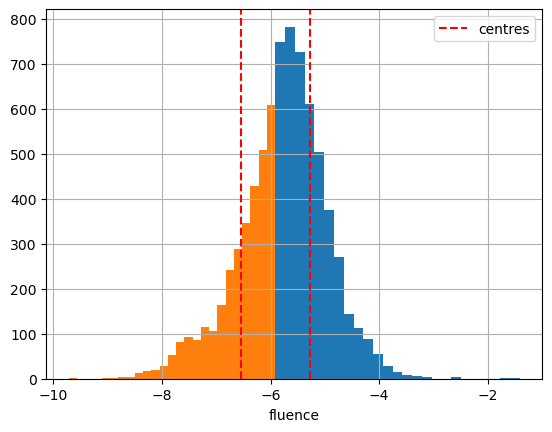

In [74]:
n_clusters = 2                               # long and short GRB

clf = KMeans(n_clusters,n_init='auto') 
clf.fit(logf[:,np.newaxis])
centers = clf.cluster_centers_               # location of the clusters
labels = clf.predict(logf[:,np.newaxis])  # labels for each of the points

print('Threshold =', min(logf[labels==np.argmax(centers)]) )

plt.hist(logf[labels==0],bins=25)
plt.hist(logf[labels==1],bins=25)
plt.axvline(centers[0],c='r',linestyle='--', label='centres')
plt.axvline(centers[1],c='r',linestyle='--')
plt.grid()
plt.xlabel('fluence')
plt.legend()
plt.show()

Threshold = -0.060480747381381476


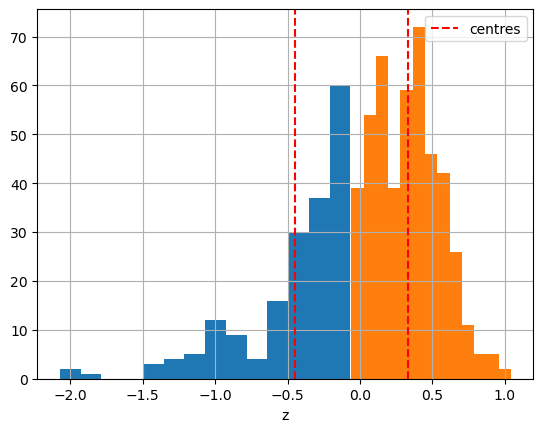

In [100]:
n_clusters = 2                               # long and short GRB

clf = KMeans(n_clusters,n_init='auto') 
clf.fit(logz[:,np.newaxis])
centers = clf.cluster_centers_               # location of the clusters
labels = clf.predict(logz[:,np.newaxis])  # labels for each of the points

print('Threshold =', min(logz[labels==np.argmax(centers)]) )

plt.hist(logz[labels==0],bins='fd')
plt.hist(logz[labels==1],bins='fd')
plt.axvline(centers[0],c='r',linestyle='--', label='centres')
plt.axvline(centers[1],c='r',linestyle='--')
plt.grid()
plt.xlabel('z')
plt.legend()
plt.show()

#### GaussianMixture

[0.25679317 0.74320683]


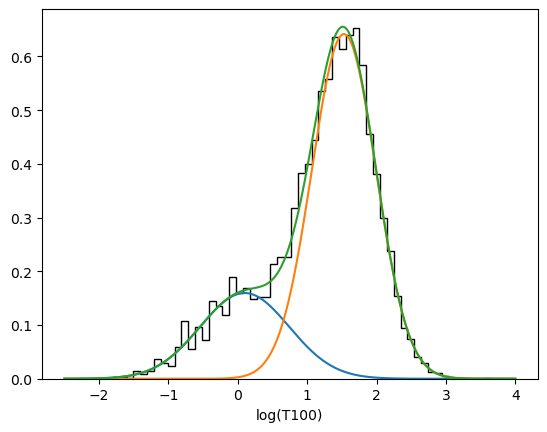

In [90]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(logT100[:,np.newaxis])
mu = gm.means_[:,0]
sigma = np.sqrt( gm.covariances_[:,0,0] )
weight = gm.weights_
print(weight)

plt.hist(logT100,bins='fd',histtype='step',color='k',density=True)

x = np.linspace(-2.5,4,1000)
import scipy
G1 = weight[0] * scipy.stats.norm(mu[0],sigma[0]).pdf(x) 
G2 = weight[1] * scipy.stats.norm(mu[1],sigma[1]).pdf(x) 
plt.plot(x,G1)
plt.plot(x,G2)
plt.plot(x,G1+G2)
plt.xlabel('log(T100)')
plt.show()

Text(0.5, 1.0, 'Responsabilities')

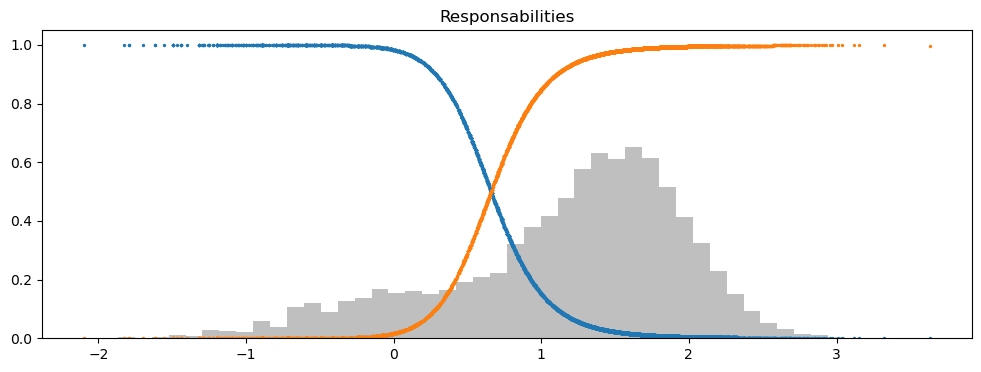

In [106]:
resp = gm.predict_proba(logT100[:,np.newaxis])

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
ax.hist(logT100,bins=50, density=True, color='grey', alpha=0.5)
ax.scatter(logT100, resp[:,0], s=2)
ax.scatter(logT100, resp[:,1], s=2)
ax.set_title('Responsabilities')

In [98]:
ThreshGM = resp[np.argmin(abs(resp[:,1]-resp[:,0])), 0]
ThreshGM

0.5020901236403109

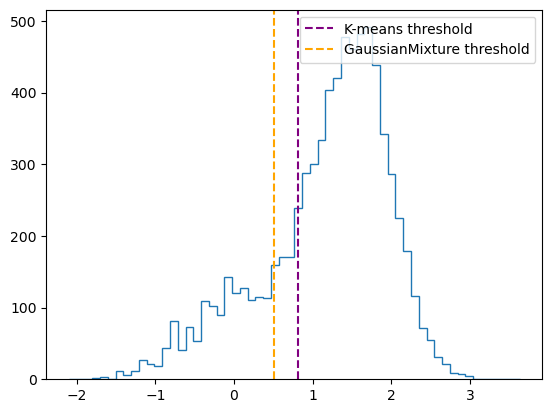

In [107]:
plt.hist(logT100, bins='fd', histtype='step')
plt.axvline(ThreshKM, color='purple', ls='dashed', label='K-means threshold')
plt.axvline(ThreshGM, color='orange', ls='dashed', label='GaussianMixture threshold')
plt.legend()
plt.show()

### T100 vs fuence

I choose those two parameters for the clustering because it's the best combination that shows separate clusters in 2D. The redshift has too few points (once removed NaN values), while the T90-T100 are strongly correlated, and the T90-fluence is essencilly the same as the T100-fluence plot.

In [140]:
fluence = np.array(data[9],dtype=np.float64)
T100    = np.array(data[12],dtype=np.float64)

# Delete NaN values
f = np.log10(fluence[(fluence > 0) & (T100 > 0)])
t100 = np.log10(T100[(fluence > 0) & (T100 > 0)])
print(len(f), len(t100))

7496 7496


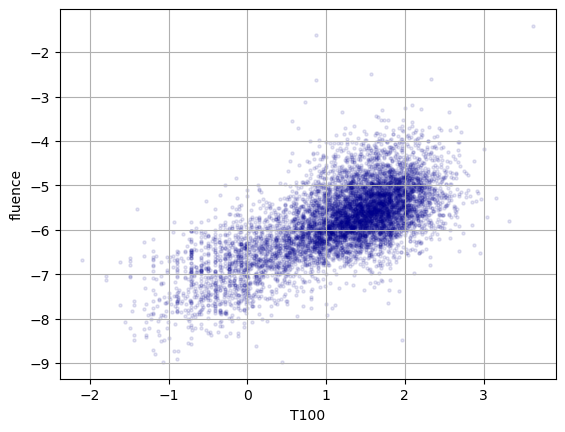

In [141]:
# Show distribution
plt.scatter(t100, f, s=5,c='darkblue',alpha=0.1)

plt.xlabel('T100')
plt.ylabel('fluence')
plt.grid()

#### K-means

In [170]:
# Prepare data for KMeans
X = np.zeros((len(t100), 2))
X[:,0] = t100
X[:,1] = f

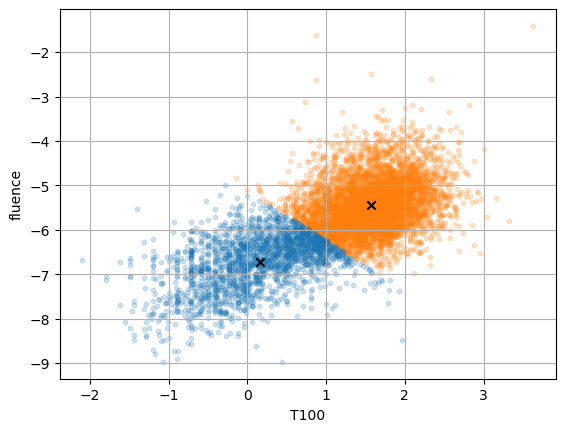

In [171]:
from sklearn import preprocessing

n_clusters = 2
clf = KMeans(n_clusters, n_init='auto') 
clf.fit(X)
centers = clf.cluster_centers_    #location of the clusters
labels = clf.predict(X)           #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C1', 'C0', 'C2','C3','C4']
for i in range(n_clusters):
    plt.scatter(X[labels==i,0], X[labels==i,1], color=colors[i], s=10, alpha=0.2)
    plt.scatter(centers[i,0], centers[i,1], marker='x', color='k')

plt.grid()
plt.xlabel('T100')
plt.ylabel('fluence')
plt.show()

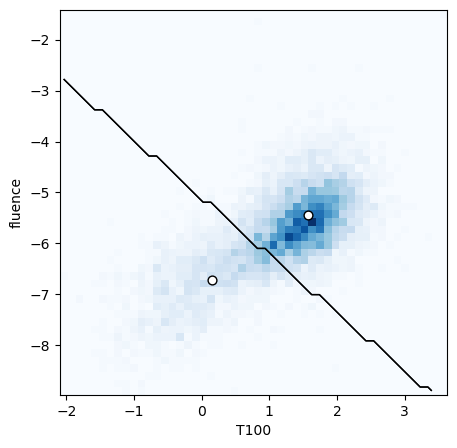

In [172]:
n_clusters = 2
scaler = preprocessing.StandardScaler()
clf = KMeans(n_clusters, n_init='auto')
clf.fit(scaler.fit_transform(X))


# Make some plots
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

l = 50
#Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X[:,0], X[:,1], l)

# plot density
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues')

# plot cluster centers
cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, l * l)).T

H = clf.predict(scaler.transform(Xgrid)).reshape((l, l))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')

    H = clf.predict(scaler.transform(Xgrid)).reshape((l, l))
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('T100')
ax.set_ylabel('fluence')

plt.show()

#### Mean-shift

In [145]:
from sklearn.cluster import MeanShift

In [189]:
scaler = preprocessing.StandardScaler()
bandwidth = 0.5

ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True, 
               cluster_all=False)
ms.fit(scaler.fit_transform(X))

MeanShift(bandwidth=0.5, bin_seeding=True, cluster_all=False)

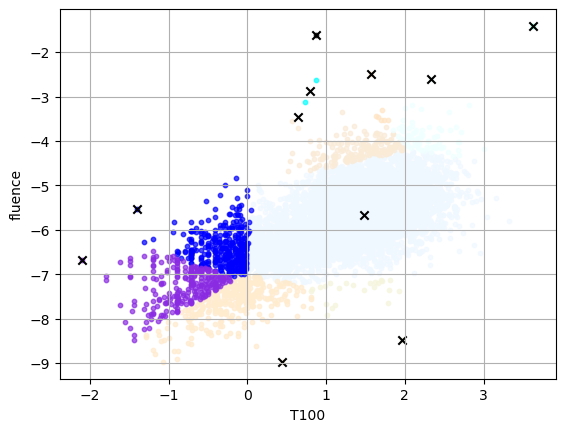

In [190]:
centers = scaler.inverse_transform(ms.cluster_centers_)
labels = ms.predict(scaler.fit_transform(X)) 


import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())

for i in range(len(centers)):
    plt.scatter(X[labels==i,0], X[labels==i,1], color=colors[i], s=10, alpha=0.7)
    plt.scatter(centers[i,0], centers[i,1], marker='x', color='k')

plt.grid()
plt.xlabel('T100')
plt.ylabel('fluence')
plt.show()

[-1  0  1  2  3  4  5  6  7  8  9 10]
0.5
number of estimated clusters : 11


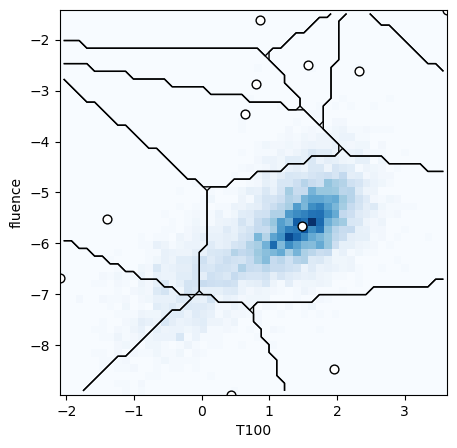

In [191]:
labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print(bandwidth)
print("number of estimated clusters :", n_clusters)

# Make some plots
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X[:,0], X[:,1], 50)

# plot density
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues')

# plot cluster centers
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
 
    H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('T100')
ax.set_ylabel('fluence')

plt.show()

#### Comment
From the logarithmic plot of the Fluence vs T100 we can qualitatively see 2 clusters. With K-means clustering method we obtain the separation of the data in 2 classes (we set it manually, since we know there are short and long GRB), but with Shift-means method the outliers play an important role and the clustering process identifies many classes. The number of clusters depends on the bandwidth (increases as the bandwidth decreases, due to the KDE inside Shift-means).

### Fluence, T90, T100: dimensionality reduction
Here we consider 3 variables, apply PCA method for dimensionality reduction (to 2 variables) and classify the resulting data with K-means and Shift-mean, as we did above. The 2 modality is more evident in this plot, but it essencially reproduces the same pattern of the plot T100vsFluence, since T100 and T90 are very similarly distributed. Again, the outliers and the relative low number of points results in many classes when we don't set n_component previously. 

In [265]:
fluence = np.array(data[9],dtype=np.float64)
T100    = np.array(data[12],dtype=np.float64)
T90     = np.array(data[6],dtype=np.float64)

# Delete NaN values
f = np.log10(fluence[(fluence > 0) & (T100 > 0) & (T90 > 0)])
t100 = np.log10(T100[(fluence > 0) & (T100 > 0) & (T90 > 0)])
t90 = np.log10(T90[(fluence > 0) & (T100 > 0) & (T90 > 0)])

# Prepare data
X_ = np.zeros((len(t100), 3))
X_[:,0] = t100
X_[:,1] = f
X_[:,2] = t90

#### PCA

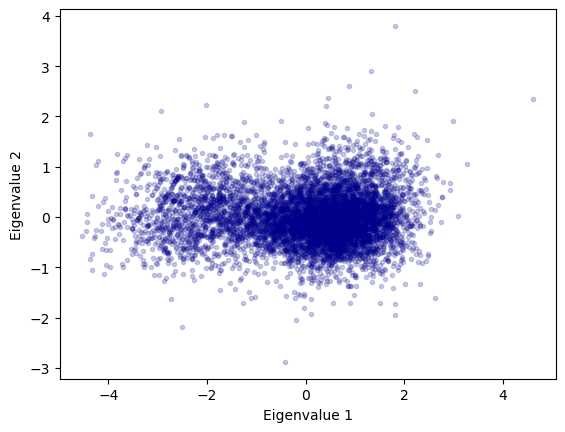

In [266]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
pca.fit(X_) 
X_reduced = pca.transform(X_)
X_reduced.shape

plt.scatter(X_reduced[:,0], X_reduced[:,1], marker=".", color='darkblue', alpha=0.2)

plt.xlabel('Eigenvalue 1')
plt.ylabel('Eigenvalue 2')
plt.show()

#### K-means

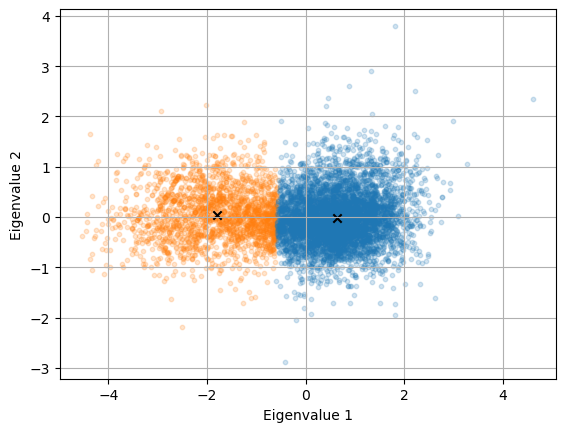

In [267]:
n_clusters = 2
clf = KMeans(n_clusters,n_init='auto') 
clf.fit(X_reduced)
centers = clf.cluster_centers_ 
labels = clf.predict(X_reduced) 

colors = ['C1', 'C0', 'C2','C3','C4']
for i in range(n_clusters):
    plt.scatter(X_reduced[labels==i,0], X_reduced[labels==i,1], color=colors[i],s=10, alpha=0.2)
    plt.scatter(centers[i,0], centers[i,1], color='k', marker='x')

plt.grid()
plt.xlabel('Eigenvalue 1')
plt.ylabel('Eigenvalue 2')
plt.show()

#### Mean-shift

[-1  0  1  2  3  4  5  6]
1
number of estimated clusters : 7


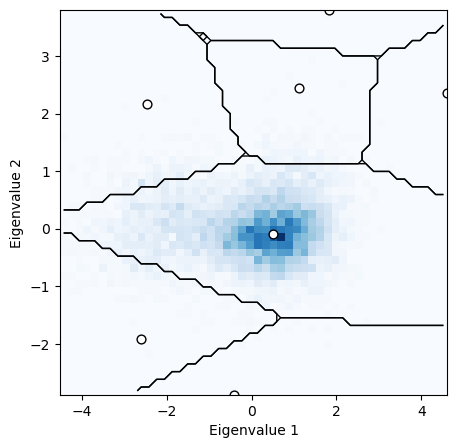

In [268]:
scaler = preprocessing.StandardScaler()
bandwidth = 1

ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True, 
               cluster_all=False)
ms.fit(scaler.fit_transform(X_reduced))


labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print(bandwidth)
print("number of estimated clusters :", n_clusters)

# Make some plots
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X_reduced[:,0], X_reduced[:,1], 50)

# plot density
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues')

# plot cluster centers
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
 
    H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()

In [272]:
# exlude outliers
X_noout = []
for i in range(len(X_reduced)):
    if np.sqrt((X_reduced[i,0]-centers[0,0])**2 + (X_reduced[i,1]-centers[0,1])**2) < 1.5 or np.sqrt((X_reduced[i,0]-centers[1,0])**2 + (X_reduced[i,1]-centers[1,1])**2) < 1.5:
        X_noout.append([X_reduced[i,0], X_reduced[i,1]])
X_noout = np.array(X_noout)
X_noout.shape

(7096, 2)

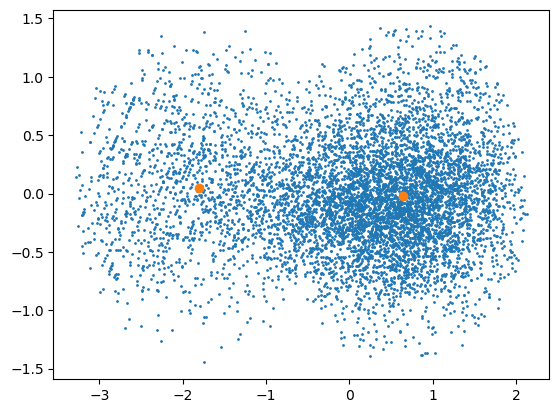

In [270]:
plt.scatter(X_noout[:,0], X_noout[:,1],s=1)
plt.scatter(centers[:,0],centers[:,1])

[-1  0  1  2  3  4  5  6  7  8]
0.7
number of estimated clusters : 9


/tmp/ipykernel_2373/4201575059.py:49: UserWarning: No contour levels were found within the data range.
  ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
/tmp/ipykernel_2373/4201575059.py:49: UserWarning: No contour levels were found within the data range.
  ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
/tmp/ipykernel_2373/4201575059.py:49: UserWarning: No contour levels were found within the data range.
  ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
/tmp/ipykernel_2373/4201575059.py:49: UserWarning: No contour levels were found within the data range.
  ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],


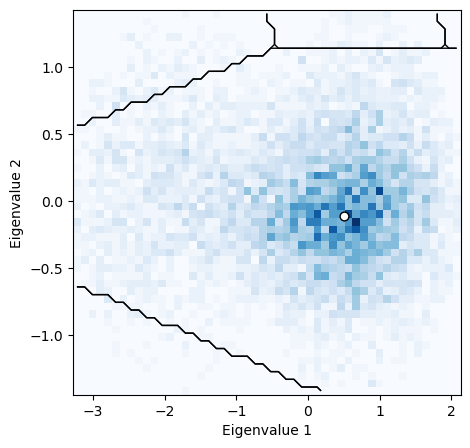

In [271]:
scaler = preprocessing.StandardScaler()
bandwidth = 0.7

ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True, 
               cluster_all=False)
ms.fit(scaler.fit_transform(X_reduced))


labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print(bandwidth)
print("number of estimated clusters :", n_clusters)

# Make some plots
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X_noout[:,0], X_noout[:,1], 50)

# plot density
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues')

# plot cluster centers
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
 
    H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()

The problem are not the outliers. Mean-shift doesn't see the division into 2 clusters in the data because it follows the increasing direction of the gradient of the pdf and here we have only one global maximum, as we can guess from the histogram below.

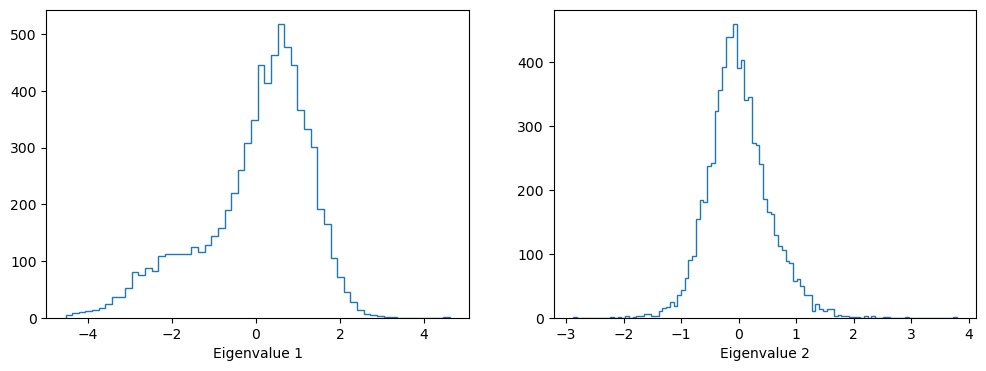

In [273]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.hist(X_reduced[:,0], bins='fd', histtype='step')
plt.xlabel('Eigenvalue 1')

ax = fig.add_subplot(122)
ax.hist(X_reduced[:,1], bins='fd', histtype='step')
plt.xlabel('Eigenvalue 2')
plt.show()